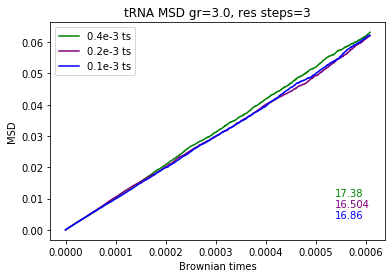

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import linregress

%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return np.array(r2_lists)*0.0059**2,np.add.reduce(r2_lists)/(len(r2_lists))*0.0059**2,np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS*6.21607E-07

def MSD_noise(MSD_vals):
    MSD_list = list()
    for sim in MSD_vals[0]:
        MSD_list.append(linregress(MSD_vals[2][0:-1],sim[0:-1])[0]/2)
    #N = 1000
    #bootstrap_MSD=list()
    #for i in range(N):
    #    bootstrap_MSD.append(np.average((np.random.choice(MSD_list,len(MSD_list)))))        
    return np.std(MSD_list/np.sqrt(len(MSD_list)))
path='/Users/Akshay/Documents/TranslationDynamics/data/'
data = "190910_0029/" 
n = 50
slopes = list()
res_steps=3
k=0
start=0
end=-1
species = 'tRNA'

colors = ['green','purple','blue','orange']
MSD_vals=MSD(path+data,k,k+n,species)
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='green',label="0.4e-3 ts")
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

MSD_vals = MSD(path+data,k+n,k+2*n,species)
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
plt.plot(MSD_vals[2][start:end]/(res_steps*1),MSD_vals[1][start:end],color='purple',label="0.2e-3 ts")

MSD_vals=MSD(path+data,k+2*n,k+3*n,species)
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='blue',label="0.1e-3 ts")

#MSD_vals=MSD(path+data,k+3*n,k+4*n,species)
#slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
#plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='orange',label="0.05e-3 ts")

plt.legend()
plt.title(species + ' MSD gr=3.0'+", res steps="+str(res_steps))

plt.xlabel("Brownian times")
plt.ylabel("MSD")

for i in range(len(slopes)):
    plt.text(0.85,0.2-0.05*i,np.round(np.array(slopes)*res_steps/6,3)[i],color=colors[i],transform=plt.gca().transAxes)